# Análise de dados - Cálculo de determinantes

### Bibliotecas importadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Extração de dados dos arquivos .csv

Para essa análise, definimos que a ordem de menor ordem de matriz seria igual a 4, e a maior ordem de matriz seria igual a 8.

Como a criação dos arquivos com os resultados dos testes seguem uma padronização, sendo determinado como: Resultado + ordem da matriz + .csv, com isso, implementamos uma estrutura de repetição e armazenamos em uma lista como os *Data Frames* dos resultados. 

In [2]:
matrizMin = 4 # menor ordem de matriz selecionada para análise
matrizMax = 8 # maior ordem de matriz selecionada para análise


resultado = list()

for i in range(matrizMin, matrizMax +1):
  resultado.append( pd.read_csv(f'../datasets/Resultado{i}.csv', sep=',') )

# Visualização padrão dos dados
resultado[0].head()

teste = resultado[0]

Os *Data Frames* apresentam a mesma estrutura, constituindo-se de três atributos representados com cada um dos métodos de cálculo de determinantes, com 1.000 (mil) registros em cada um dos arquivos. 

Os registro numéricos representam o tempo de execução de resolução da determinante, em seus respectivos métodos. A unidade de tempo utilizada foi em nanosegundos.

## Tratamento dos dados
Para iniciarmos a nossa investigação, consultamos a dispersão de resultados em cada um dos atributos de cada tabela. Por meio de um gráfico *Box Plot*, notamos sempre haver resultados fora do desvio padrão, o que numericamente eleva a média aritimética, e gráficamente comprime o *Box Plot*, assim dificultando a visualização.

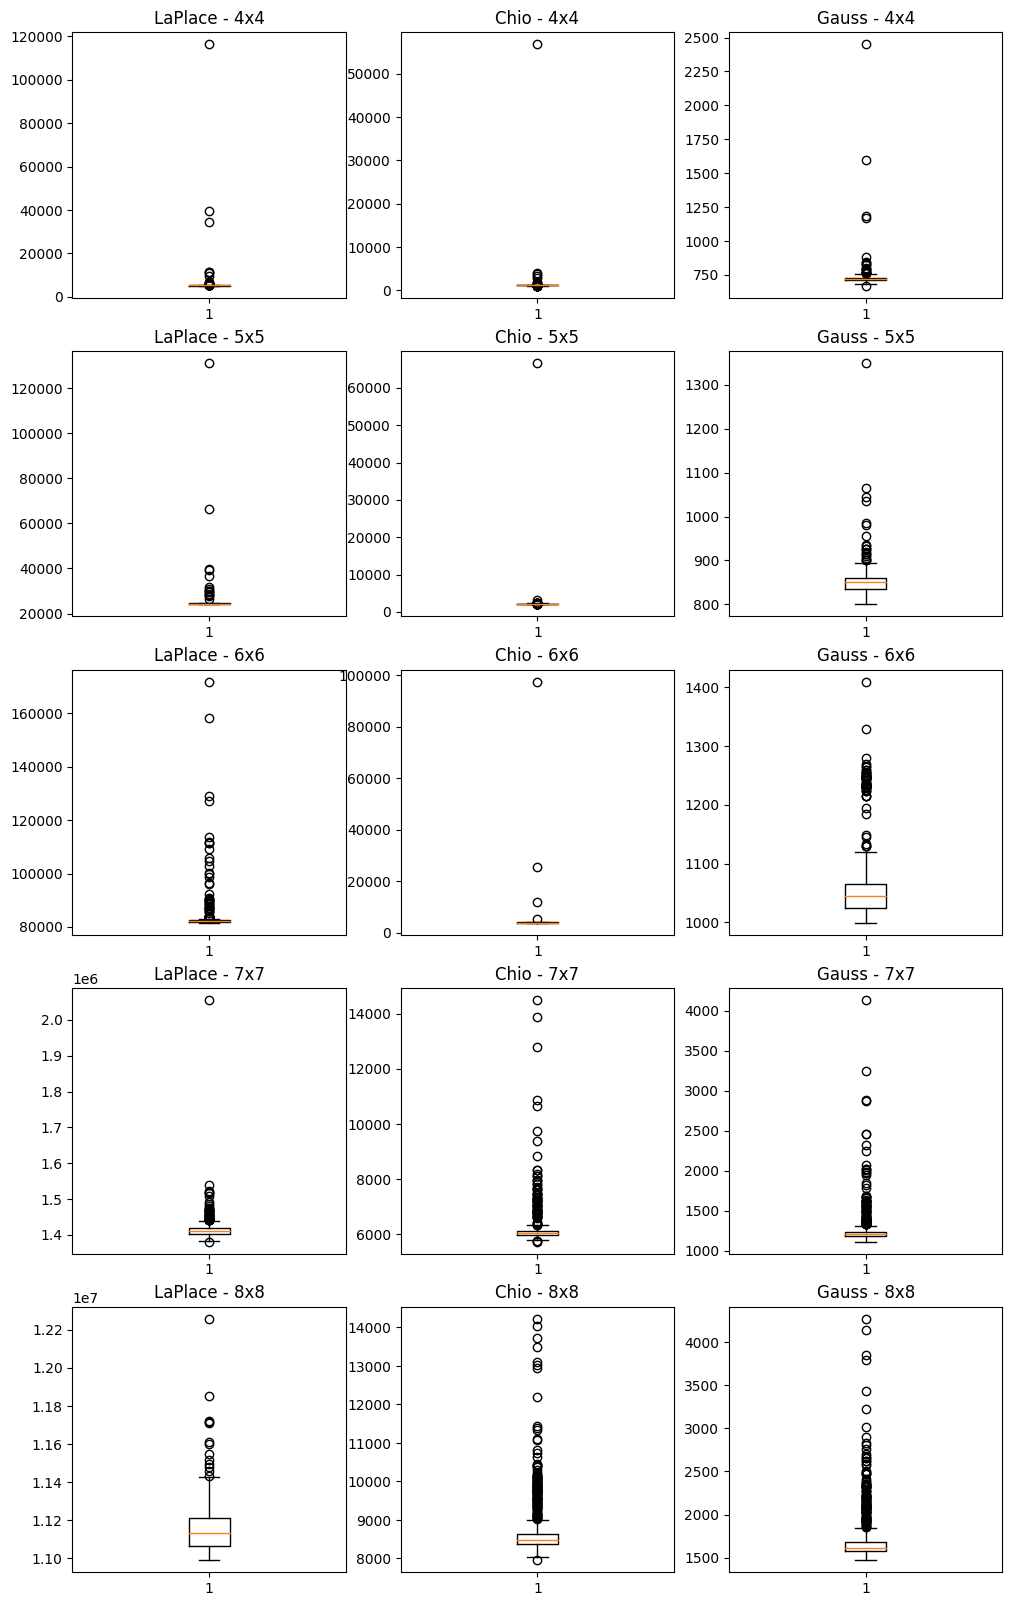

In [65]:
# gráficos da dispersão de dados por atributo
fig, ax = plt.subplots(figsize=(12, 20)) 
i = 1
ordem = 4
ax.remove()
for matriz in resultado:
    for key,value in enumerate(matriz):
        
        plt.subplot(5, 3, i) 
        plt.title(f"{value} - {ordem}x{ordem}")
        plt.boxplot(matriz[value])
        i+=1
    ordem+=1
plt.show() 

Para solucionar essa questão, optamos por utilizar a abordagem **intervalo interquartil (IQR)**, para encontrar valores discrepantes. Para localizar um valor de base atípico, define-se o valor do IQR por meio do percentil 75% (Quartil 3) - percentil de 25% (Quartil 1), multiplicado por 1,5, ou seja, IQR * 1.5, o limite superior e inferior são determinados pelas seguintes fórmulas:

superior = Quartil 3 + 1,5 * IQR

inferior = Quartil 1 - 1,5 * IQR

Na fórmula acima, de acordo com as estatísticas, utilizada para considerar todos os dados entre 2,7 desvios padrão na Distribuição Gaussiana.

In [66]:
# Tratamento dos dados - resultados dispersos da mediana

tratamentoDados = list()
for matriz in resultado:
    
    metodos = list()
    for k, met in enumerate(matriz):

        # Percentil 
        Q1 = np.percentile(matriz[met], 25)
        Q3 = np.percentile(matriz[met], 75)
        IQR = Q3 - Q1

        sup = (Q3+1.5*IQR)
        sub = (Q1-1.5*IQR)

        limiteSuperior = matriz[met][matriz[met] < sup]
        limiteInferior = limiteSuperior[limiteSuperior > sub]               

        metodos.append(limiteInferior)
    
   
    
    tratamentoDados.append(metodos)
    

### Gráfico
Os gráficos apresentam que os resultados fora do desvio padrão foram devidamente eliminados.

Juntamente totaliza a quantidade de registros que se mantiveram, após o devido tratamento dos critérios determinados no intervalo interquartil.

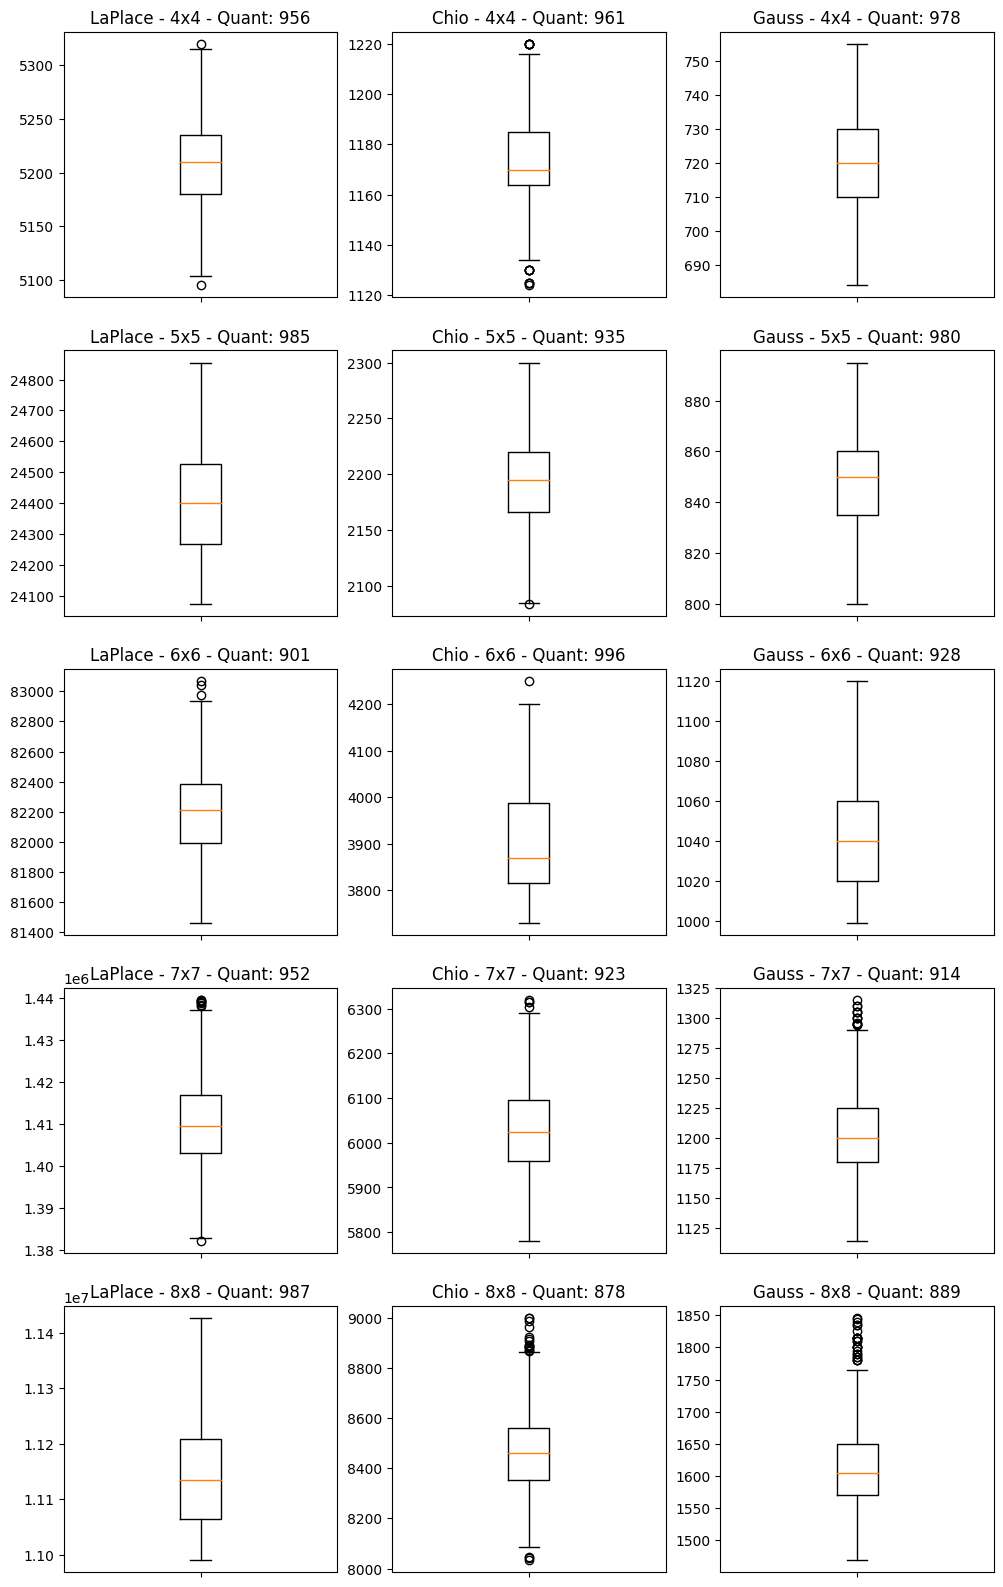

In [67]:
# gráfico dos dados tratados
    
fig, ax = plt.subplots(figsize=(12, 20)) 
i = 1
ordem = 4
ax.remove()
nomeMetodo = ['LaPlace','Chio','Gauss']
for matriz in tratamentoDados:
    ordem_n = 0
    for metodo in (matriz):
        
        plt.subplot(5, 3, i)
        plt.title(f"{nomeMetodo[ordem_n]} - {ordem}x{ordem} - Quant: {len(metodo)}")
        plt.xticks([2])
        plt.boxplot(metodo)
        i+=1
        ordem_n+=1
    ordem+=1

plt.show()

Com os dados devidamente tratados, decidimos utilizar a média aritmética dos resultados de cada método por tamanho da ordem da matriz.

In [68]:
medLaplace = list()
medChio = list()
medGauss = list()

# listas com o cálculo das médias 
for matrizN in transformado:
  medLaplace.append(matrizN[0].mean())
  medChio.append(matrizN[1].mean())
  medGauss.append(matrizN[2].mean())


# variáveis para análise
metodos = ['Laplace', 'Chio', 'Gauss']
ordemMatriz = ['4','5','6','7','8']
medias = {
    'Laplace': medLaplace,
    'Chio': medChio,
    'Gauss' : medGauss
}

# Tabela das médias
def formatar(valor):
    return "{:.1f}".format(valor)

resultadosFinais = pd.DataFrame(medias)

for k,v in enumerate(resultadosFinais):
    resultadosFinais[v] = resultadosFinais[v].apply(formatar)

resultadosFinais['Ordem'] = ordemMatriz

## Resultados
Para solução de calculo de determinante, em termos computacionais, o método de eliminação de Gauss se demonstrou mais eficiente independentemente da ordem da matriz. O método menos eficiente foi o Teorema de LaPlace.

Amplia-se a diferença de complexidade de tempo dos resultados conforme aumenta a ordem da matriz quadrada, mesmo para o método de Regra de Chio, o método de eliminação de Gauss se apresentou mais eficiente.

A tabela a seguir apresenta as médias aritméticas dos resultados: 

In [69]:
display(resultadosFinais)

,Laplace,Chio,Gauss,Ordem
0,5210.8,1172.8,720.8,4
1,24404.8,2194.3,848.0,5
2,82214.1,3894.6,1042.3,6
3,1410320.2,6026.7,1203.8,7
4,11145518.9,8465.3,1618.4,8


### Gráfico
O gráfico no eixo do tempo de execução encntra-se na escala logartima, devido a grande diferença de tempo entre os métodos. 

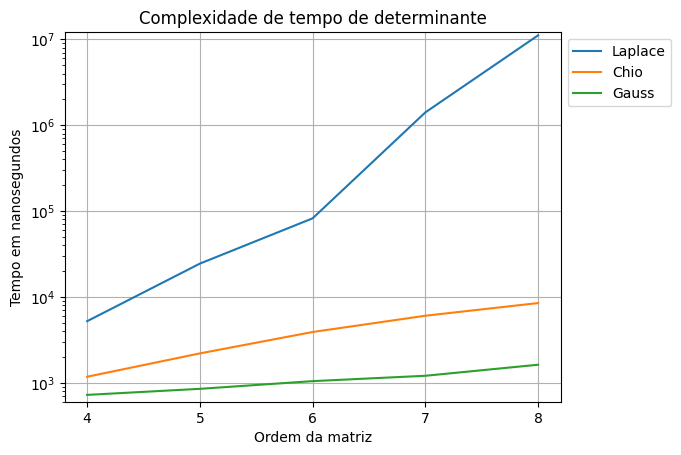

In [74]:
# Axes e títulos
plt.title("Complexidade de tempo de determinante")
plt.xlabel("Ordem da matriz")
plt.xscale('linear')
plt.ylim(4, 8)
plt.ylabel("Tempo em nanosegundos")
plt.ylim(600, 12145518)
plt.yscale('log')

# inserindo elementos para o gráfico
for m in metodos:
    plt.plot(ordemMatriz, medias[m])

# plotagem do gráfico
plt.grid(True)
plt.legend(metodos, bbox_to_anchor=(1, 1))
plt.show()

O que explica o gráfico do teorema de LaPlace, a quantidade de determinantes que precisamos calcular aumenta à medida em que a ordem da matriz cresce, o que corresponde ao fatorial da ordem da matriz. Mesmo que seja utilizado o algoritmo com a Regra de Sarrus, para o cálculo direto de determinantes de ordem 3.

Podemos concluir também que a sua complexidade é de no mínimo O(n!), assim, considerado mais elevado do que a complexidade exponencial.

## Considerações finais
Com esses resultados, conseguimos compreender a importância de compreender a complexidade do algoritmo que desenvolvemos, pois um algoritmo mais otimizado, aumenta a performance de processamento de nosso códigos.